## Some Exploratory Analysis using the FRF Currituck Sound Stations Data:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Set the source data file path(s) and name(s) in prep for ingest:

In [34]:
file_path='/Users/paulp/GoogleDrive/projects/CurrituckSnd/CS_Stations/CS01/'
file_name_WQ='FRF_CS01_EXO_201602.csv'
file_name_wave='FRF_CS01_SBE26_Waves_201602.csv'
file_name_curr='FRF_CS01_ADOP_Currents_201602.csv'

### Load the Water Quality (WQ), Waves, and Currents data into individual pandas dataframes:

We'll load the data initially into separate dfs, but will merge the three, based on a common time base, soon enough...

We also take care of the missing values marker used in the source data (-999.0) and convert these to NaN.

In [55]:
df_wq=pd.read_csv(file_path+file_name_WQ, na_values=-999.0)
df_wav=pd.read_csv(file_path+file_name_wave, na_values=-999.0)
df_cur=pd.read_csv(file_path+file_name_curr, na_values=-999.0)

### Set the index for each of the three dataframes to the date and time:

Convert the datetime field (which is in the source data read as a string object) to a Python datetime type and then assign that datetime as the index for each df.

In [56]:
df_wq['datetime'] = pd.to_datetime(df_wq['datetime'], utc=True)
df_wav['datetime'] = pd.to_datetime(df_wav['datetime'], utc=True)
df_cur['datetime'] = pd.to_datetime(df_cur['datetime'], utc=True)

In [57]:
df_wq.set_index('datetime', inplace=True)
df_wav.set_index('datetime', inplace=True)
df_cur.set_index('datetime', inplace=True)

### Aggregate sensor records in each of the three dfs by time 

We'll *resample* the index.day. This will make it a bit easier to sync each of the three data sets (water quality, waves, and currents) to a common time base. Aggregation = the arithmetic mean

In [58]:
#isinstance(df_wq.index, pd.DatetimeIndex)
df_wq=df_wq.resample('D').mean().copy()
df_wav=df_wav.resample('D').mean().copy()
df_cur=df_cur.resample('D').mean().copy()

### Check the length of each of the three dfs.

If there are differences it can cause intractable issues when we move on to drawing plots...

In [59]:
print(len(df_wq), len(df_wav), len(df_cur) )

13 13 13


### Plot Water Quality Turbidity vs Significant Wave Height for the period covered by the source data:

PPMCC Correlation: 0.918


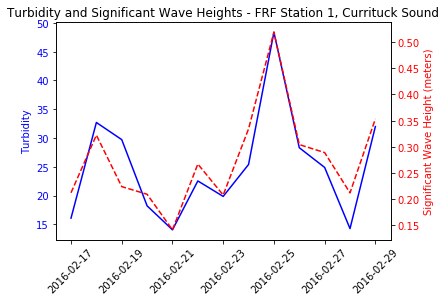

In [81]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # instantiate a second axis that shares the same x-axis

ax1.plot(df_wq.index, df_wq['turbidity'], color='blue')
ax1.tick_params(axis='x', rotation=45)  
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylabel('Turbidity', color='blue')

ax2.plot(df_wav.index, df_wav['waveHs'], '--r')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylabel('Significant Wave Height (meters)', color='red')

plt.title('Turbidity and Significant Wave Heights - FRF Station 1, Currituck Sound')
print('PPMCC Correlation:', round( df_wq['turbidity'].corr(df_wav['waveHs']), 3) )

### Plot Water Quality Chlorophyll vs Significant Wave Heights for the period covered by the source data:

PPMCC Correlation: 0.579


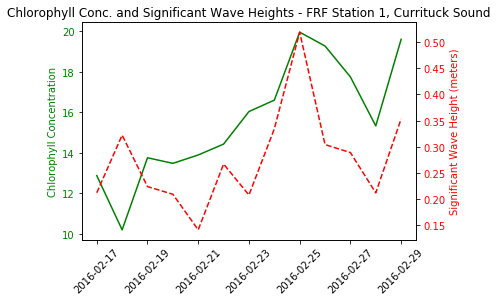

In [82]:
fig, ax3 = plt.subplots()
ax4 = ax3.twinx()  # instantiate a second axis that shares the same x-axis

ax3.plot(df_wq.index, df_wq['chlorophyll'], color='green')
ax3.tick_params(axis='x', rotation=45)  
ax3.tick_params(axis='y', labelcolor='green')
ax3.set_ylabel('Chlorophyll Concentration', color='green')

ax4.plot(df_wav.index, df_wav['waveHs'], '--r')
ax4.tick_params(axis='y', labelcolor='red')
ax4.set_ylabel('Significant Wave Height (meters)', color='red')

plt.title('Chlorophyll Conc. and Significant Wave Heights - FRF Station 1, Currituck Sound')
print('PPMCC Correlation:', round( df_wq['chlorophyll'].corr(df_wav['waveHs']), 3) )